In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import device, nn, optim
from PIL import Image

model = torch.load('./recognition-model.pt')
model.eval()

C:\Users\gu9jr\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] Não foi possível encontrar o procedimento especificado'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [2]:
def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.squeeze(), cmap='gray')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [3]:
def image_loader(img_path):
    loader = transforms.Compose([
        transforms.Grayscale(num_output_channels=1), 
        transforms.ToTensor(),
        transforms.Resize((28, 28)),
    ])
    
    image = Image.open(img_path)
    image = loader(image).float()
    return image

In [10]:
img = image_loader('./cinco.png')

with torch.no_grad():
    logps = model(img.view(1, -1))

Dígito previsto = 7


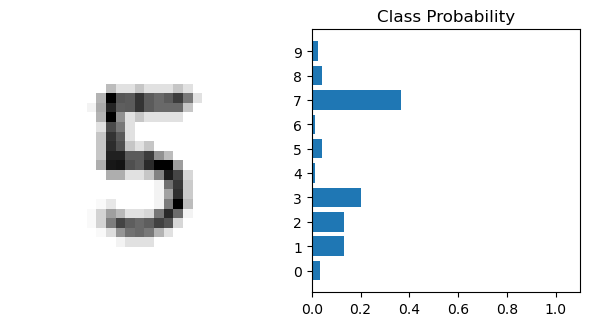

In [11]:
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Dígito previsto =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)